In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

f = open("results_ASOAFE_adversarial.json")
f2 = open("results_ASOAFE.json")

array_ee_adversarial = json.load(f)["data"]
array_ee = json.load(f2)["data"]


FileNotFoundError: [Errno 2] No such file or directory: 'results_ASOAFE.json'

In [2]:
def plot_chart(arr_1, arr_2, legend_1='SOM', legend_2="SOM + Adversarial", xlabel='Geração', ylabel="F1-Score"):
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 7.5)
    plt.plot(arr_1, 'g^', label=legend_1)
    plt.plot(arr_2, 'bs', label=legend_2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

def plot_boxplot(arr_1, arr_2, labels=['SOM', 'SOM + Adversarial'], ylabel='F1-Score'):
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 7.5)
    plt.boxplot([arr_1,arr_2], labels=labels)
    plt.ylabel(ylabel)
    plt.show()

def get_mean(arr_1):
    return np.sum(arr_1, axis=0)/len(arr_1)
def get_max(arr_1):
    return [max(x) for x in arr_1]

In [ ]:
mean_array_ad = get_mean(array_ee_adversarial)
mean_array = get_mean(array_ee)
print(mean_array_ad)

In [ ]:
plot_chart(mean_array, mean_array_ad, 'SOM', 'SOM + Adversarial')

In [ ]:
max_array_ad = get_max(array_ee_adversarial)
max_array = get_max(array_ee)
plot_boxplot(max_array, max_array_ad)

In [ ]:
fd = open("results_ASOAFE_diabetes.json")
fdad = open("results_ASOAFE_diabetes_ad.json")

array_ee_diabetes = json.load(fd)["data"]
array_ee_diabetes_ad = json.load(fdad)["data"]

In [ ]:
mean_array_diabetes = get_mean(array_ee_diabetes)
mean_array_diabetes_ad = get_mean(array_ee_diabetes_ad)
plot_chart(mean_array_diabetes, mean_array_diabetes_ad)

In [ ]:
max_array_diabetes_ad = get_max(array_ee_diabetes_ad)
max_array_diabetes = get_max(array_ee_diabetes)
plot_boxplot(max_array_diabetes,max_array_diabetes_ad)

In [ ]:
fw = open("results_ASOAFE_megawatt.json")
fwad = open("results_ASOAFE_megawatt_ad.json")

array_ee_mw = json.load(fw)["data"]
array_ee_mw_ad = json.load(fwad)["data"]



In [ ]:
mean_array_mw = get_mean(array_ee_mw)
mean_array_mw_ad = get_mean(array_ee_mw_ad)
plot_chart(mean_array_mw,mean_array_mw_ad)


In [ ]:
max_array_mw_ad = get_max(array_ee_mw_ad)
max_array_mw =get_max(array_ee_mw)
plot_boxplot(max_array_mw,max_array_mw_ad)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
x = np.linspace(mu - 3, mu + 3, 100)
fig, _ = plt.subplots()
fig.set_size_inches(10, 7.5)

plt.plot(x,stats.norm.pdf(x, mu, math.sqrt(0.5)))
plt.plot(x,stats.norm.pdf(x, mu, math.sqrt(0.3)))
plt.plot(x,stats.norm.pdf(x, mu, math.sqrt(0.1)))
plt.legend(["Variância = 0.5","Variância = 0.3","Variância = 0.1"])

plt.show()

In [ ]:
def simple_plot(arr_1, legend, xlabel='Geração', ylabel="F1-Score"):

    plt.plot(get_mean(arr_1), label=legend)



    

diabetes


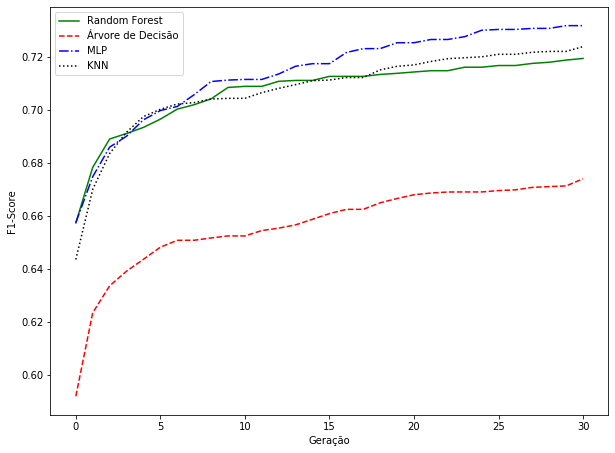

ionosphere


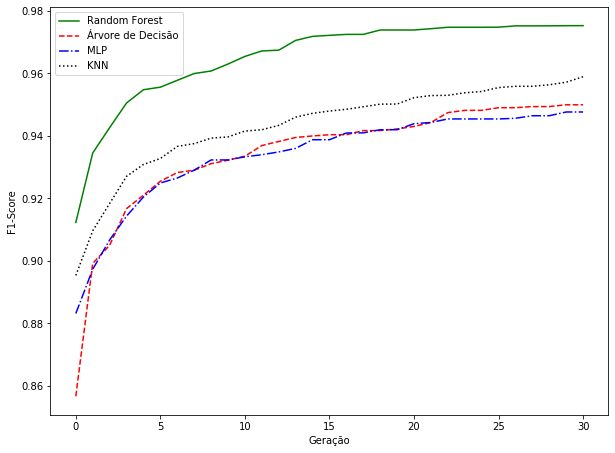

megawatt


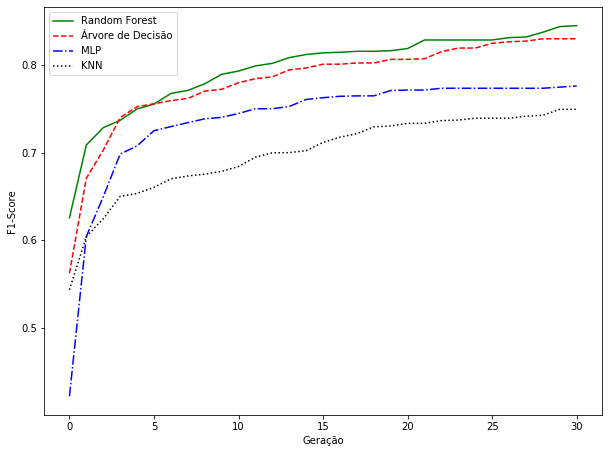

In [10]:
datasets = ['diabetes','ionosphere', 'megawatt']
models = [ 'random_forest','decision_tree','mlp', 'knn']

legends =[]

for dataset in datasets:
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 7.5)
    for model in models:
        legend_mapper= {
            'random_forest': "Random Forest",
            'decision_tree': 'Árvore de Decisão',
            'mlp': "MLP",
            'knn': "KNN"
        }
        draw_mapper = {
            'random_forest': "g-",
            'decision_tree': 'r--',
            'mlp': "b-.",
            'knn': "k:"
        }
        if model == "random_forest":
            f = json.load(open("results_ASOAFE_"+dataset+"_"+model+".json"))["data"]
        else:
            f = open("results_ASOAFE_"+dataset+"_"+model+".json")
            f = json.loads(f.read())
        plt.plot(get_mean(f), draw_mapper[model] ,label=legend_mapper[model])
    print(dataset)
    plt.xlabel("Geração")
    plt.ylabel("F1-Score")
    plt.legend()
    plt.show()
        

diabetes


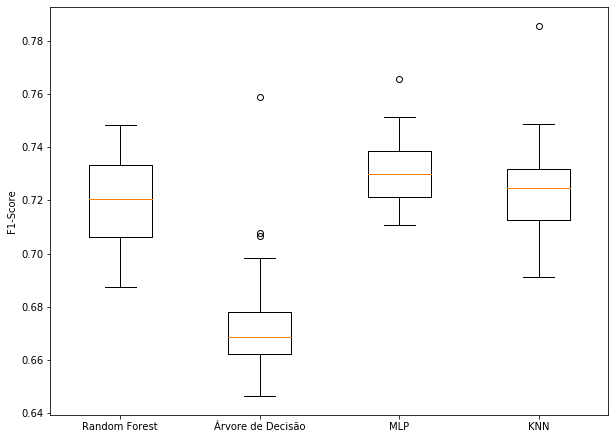

ionosphere


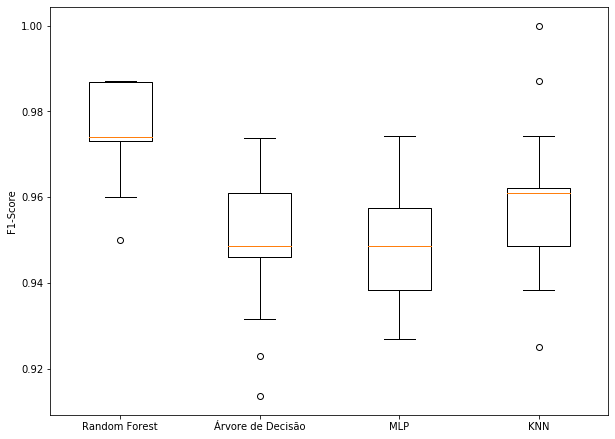

megawatt


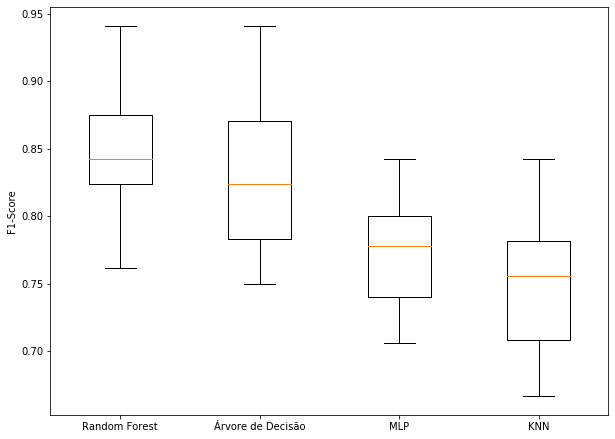

In [8]:
for dataset in datasets:
    boxplot = []
    labels = []
    for model in models:
        legend_mapper= {
            'random_forest': "Random Forest",
            'decision_tree': 'Árvore de Decisão',
            'mlp': "MLP",
            'knn': "KNN"
        }
        if model == "random_forest":
            f = json.load(open("results_ASOAFE_"+dataset+"_"+model+".json"))["data"]
        else:
            f = open("results_ASOAFE_"+dataset+"_"+model+".json")
            f = json.loads(f.read())
        boxplot.append(get_max(f))
        labels.append(legend_mapper[model])
    print(dataset)
    fig, _ = plt.subplots()
    fig.set_size_inches(10, 7.5)
    plt.boxplot(boxplot, labels=labels)
    plt.ylabel("F1-Score")
    plt.show()


## Análise utilizando BMU

In [3]:
datasets = ["ionosphere", "diabetes", "megawatt"]
models = ["decision_tree","random_forest", "mlp", "knn"]

        

ionosphere


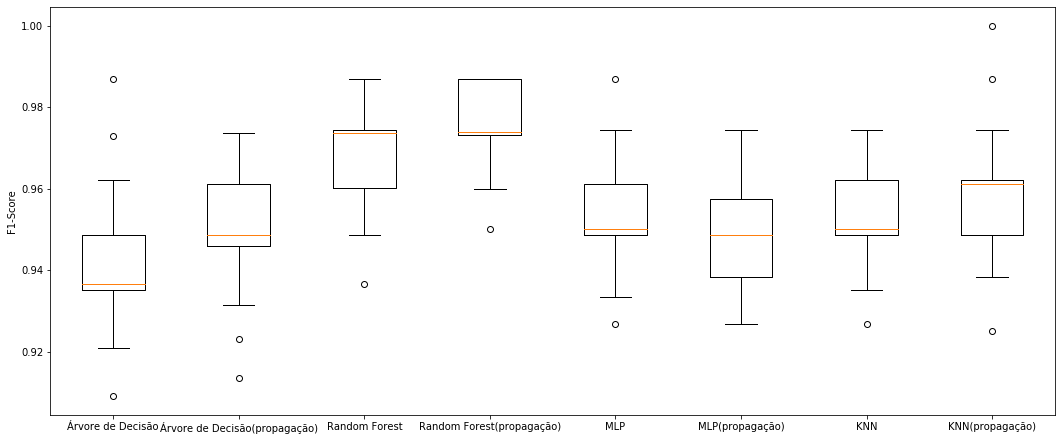

diabetes


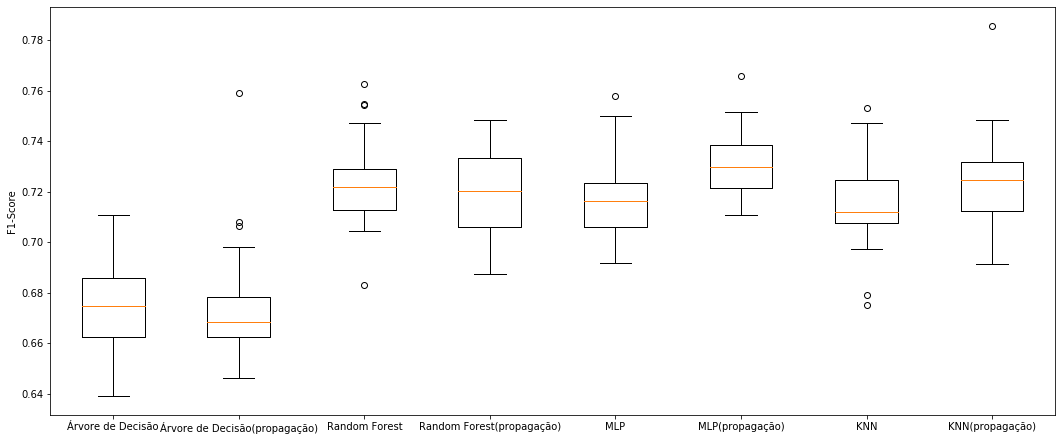

megawatt


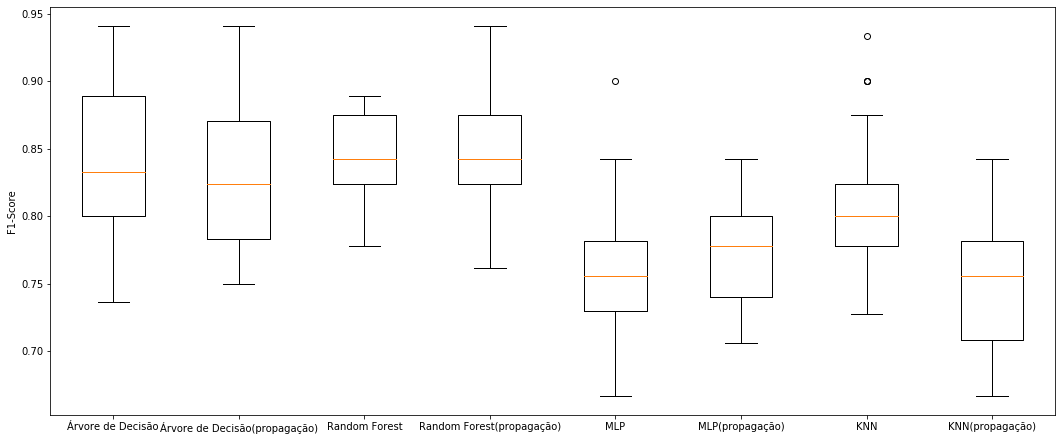

In [7]:
for dataset in datasets:
    boxplot = []
    labels = []
    for model in models:
        legend_mapper= {
            'random_forest': "Random Forest",
            'decision_tree': 'Árvore de Decisão',
            'mlp': "MLP",
            'knn': "KNN"
        }

        f = open("results_"+dataset+"_ASOAFE_bmu_"+model+".json")
        f = json.loads(f.read())
        boxplot.append(get_max(f))
        labels.append(legend_mapper[model])
        if model == "random_forest":
            f = json.load(open("results_ASOAFE_"+dataset+"_"+model+".json"))["data"]
        else:
            f = open("results_ASOAFE_"+dataset+"_"+model+".json")
            f = json.loads(f.read())
        boxplot.append(get_max(f))
        labels.append(legend_mapper[model]+"(propagação)")
    print(dataset)
    fig, _ = plt.subplots()
    fig.set_size_inches(18, 7.5)
    plt.boxplot(boxplot, labels=labels)
    plt.ylabel("F1-Score")
    plt.show()



## Tempo de Execução

Text(0, 0.5, 'Tempo (Segundos)')

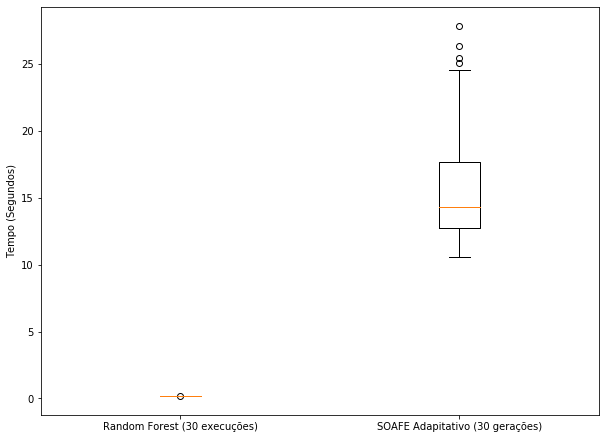

In [10]:
normal_time = [0.1603612979997706, 0.16610960100024386, 0.1704037490007977, 0.16964986299990414, 0.165665820999493, 0.16861228199923062, 0.16799148699919897, 0.16757595000035508, 0.16723745299987058, 0.16736463100005494, 0.16418760899978224, 0.16822067900011461, 0.16349801999967895, 0.16615515499961475, 0.17032047900011094, 0.16661465400011366, 0.1709837360003803, 0.16872802299985779, 0.1652937449998717, 0.1661779870000828, 0.16692208499989647, 0.16932836299929477, 0.16754104600022401, 0.1668090889997984, 0.16757315099948755, 0.16817303199968592, 0.16704626099999587, 0.16774989399982587, 0.16916238100020564, 0.16773199799990834]
asoafe_time = [24.511691457009874, 15.257642492069863, 25.437596024014056, 20.113646129029803, 13.397441466106102, 27.861099748988636, 25.03268136596307, 22.383472106070258, 26.349884447059594, 18.190005169948563, 16.099464567028917, 12.123046735068783, 13.74685507605318, 13.336314894957468, 11.767679026001133, 14.698980249930173, 15.429648971999995, 15.659594343975186, 12.190287122037262, 10.55179204896558, 13.014628174947575, 11.52818149200175, 13.769865012960508, 12.685558452969417, 14.723604824976064, 11.974652039934881, 13.753800833015703, 13.850230534095317, 12.482643713941798, 15.188400340965018]

fig, _ = plt.subplots()
fig.set_size_inches(10, 7.5)
plt.boxplot([normal_time, asoafe_time], labels=['Random Forest (30 execuções)','SOAFE Adapitativo (30 gerações)'])
plt.ylabel("Tempo (Segundos)")

In [12]:
print("MEDIA SOAFE", sum(asoafe_time)/30)
print("Media modelo normal", sum(normal_time)/30)

MEDIA SOAFE 16.237012962069517
Media modelo normal 0.16730631739989502


# Análises para o novo paper

In [15]:
f = open("results_ASOAFE_adversarial.json")
f_rf = [x[0] for x in json.loads(f.read())["data"]]
f = open("results_ad_ASOAFE_ionosphere_decision_tree.json")
f_dt = [x[0] for x in json.loads(f.read())]
f = open("results_ad_ASOAFE_ionosphere_mlp.json")
f_mlp = [x[0] for x in json.loads(f.read())]
f = open("results_ad_ASOAFE_ionosphere_knn.json")
f_knn = [x[0] for x in json.loads(f.read())]


Text(0, 0.5, 'F1-Score')

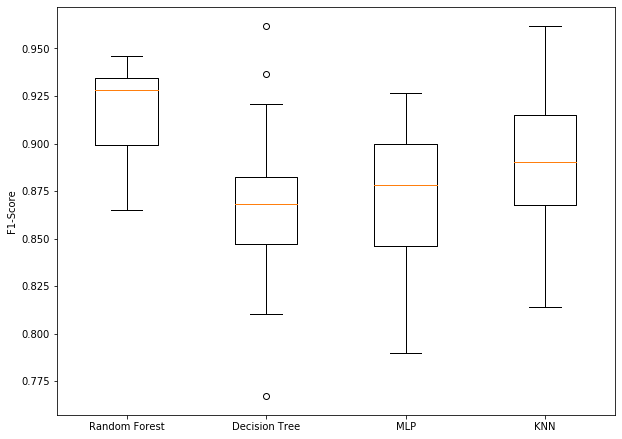

In [30]:
fig, _ = plt.subplots()
fig.set_size_inches(10, 7.5)
plt.boxplot([
    #[0.9510489510489509, 0.9640287769784172, 0.9352517985611511, 0.9640287769784172, 0.9323308270676691, 0.9420289855072465, 0.9343065693430658, 0.9411764705882353, 0.9142857142857143, 0.9565217391304348, 0.9352517985611511, 0.9411764705882353, 0.9402985074626866, 0.9496402877697842, 0.9710144927536232, 0.9489051094890512, 0.9565217391304348, 0.962962962962963, 0.9428571428571428, 0.9503546099290779, 0.9503546099290779, 0.9264705882352942, 0.9496402877697842, 0.9130434782608695, 0.9571428571428572, 0.9496402877697842, 0.9104477611940298, 0.9710144927536232, 0.9635036496350365, 0.9710144927536232],
    f_rf,
    #[0.9117647058823528, 0.9343065693430658, 0.9090909090909091, 0.8985507246376812, 0.8936170212765958, 0.9510489510489509, 0.9076923076923077, 0.9130434782608695, 0.9219858156028369, 0.9185185185185185, 0.920863309352518, 0.955223880597015, 0.9420289855072465, 0.9343065693430658, 0.9411764705882353, 0.9402985074626866, 0.9333333333333335, 0.9090909090909091, 0.9022556390977443, 0.8529411764705882, 0.8709677419354839, 0.9253731343283583, 0.9510489510489509, 0.9090909090909091, 0.874074074074074, 0.9264705882352942, 0.9361702127659575, 0.9402985074626866, 0.9481481481481482, 0.9117647058823528],
    f_dt,
    #[0.9428571428571428, 0.9503546099290779, 0.9496402877697842, 0.9343065693430658, 0.9090909090909091, 0.9645390070921985, 0.9640287769784172, 0.9710144927536232, 0.9251700680272108, 0.9370629370629371, 0.9241379310344828, 0.9178082191780821, 0.920863309352518, 0.9558823529411765, 0.9558823529411765, 0.9285714285714286, 0.9166666666666667, 0.9510489510489509, 0.9295774647887325, 0.9558823529411765, 0.9054054054054055, 0.9041095890410958, 0.9496402877697842, 0.9428571428571428, 0.9305555555555556, 0.943661971830986, 0.9714285714285714, 0.9370629370629371, 0.9489051094890512, 0.9510489510489509],
    f_mlp,
    #[0.8933333333333334, 0.9006622516556291, 0.8979591836734694, 0.9166666666666667, 0.9054054054054055, 0.8979591836734694, 0.8607594936708861, 0.9066666666666667, 0.9178082191780821, 0.8645161290322582, 0.8859060402684563, 0.9189189189189189, 0.9054054054054055, 0.9444444444444444, 0.9054054054054055, 0.9370629370629371, 0.9241379310344828, 0.9041095890410958, 0.9251700680272108, 0.8979591836734694, 0.87248322147651, 0.9230769230769231, 0.8874172185430464, 0.9041095890410958, 0.9251700680272108, 0.9251700680272108, 0.8831168831168831, 0.943661971830986, 0.9241379310344828, 0.8993288590604026],
    f_knn
], 
    labels=[
        'Random Forest',
        #'Random Forest (SOAFE)',
        'Decision Tree',
        #'Decision Tree (SOAFE)',
        'MLP',
        #'MLP (SOAFE)',
        'KNN',
        #'KNN (SOAFE)'
    ])
plt.ylabel("F1-Score")